# Model From Scratch

For this specific experiment, we build a CNN model from scratch, defining each layer of the network explicitly, and then training all the weights from scratch.

To build any sort of deep learning model, we need to call the following libraries.

In [1]:
# Display image
from matplotlib.pyplot import imshow
# General purposes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# torch custom module
import torch_utils
# PyTorch stuff
import torch
from torchvision import transforms
from torchvision.datasets import CIFAR10
import torch.nn as nn
import torch.nn.functional as F 
from torch.utils.data import Dataset, DataLoader 
import torch.optim as optim

# Specifies which GPUs will be used
import os
os.environ["CUDA_DEVICE_ORDER"]='PCI_BUS_ID'
os.environ["CUDA_VISIBLE_DEVICES"]='1'

## 1. Dataset

In the next cell, we define the set of transforms applied to the images before passing to the network. 

In [2]:
custom_transforms = transforms.Compose([
    transforms.ToTensor()])

Now, we download the CIFAR10 data set.

In [3]:
train_data = CIFAR10(root='../data', train=True, download=True, transform=custom_transforms)
valid_data = CIFAR10(root='../data', train=False, download=True, transform=custom_transforms)

Files already downloaded and verified
Files already downloaded and verified


We can create a list of the classes.

In [4]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Let us take a look at a sample of the images.

frog


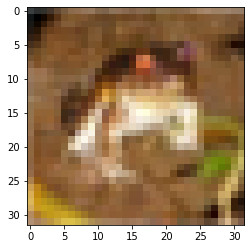

In [5]:
image, label = train_data[0]
print(classes[label])
imshow(image.permute(1, 2, 0))

cat


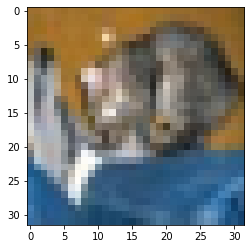

In [6]:
image, label = valid_data[0]
print(classes[label])
imshow(image.permute(1, 2, 0))

To pass the data to the neural network, we need to use a dataloader object.

In [7]:
train_dataloader = DataLoader(dataset=train_data, batch_size=16, shuffle=True)
valid_dataloader = DataLoader(dataset=valid_data, batch_size=16, shuffle=True)

## 2. Neural Network 

In this section, we will define the architecture of the network we are going to use. For this experiment, we create a model from scratch, which means defining the network layer by layer. In the next cell, we define our hand-made architecture.

In [8]:
class custom_network(nn.Module):
    # Constructor
    def __init__(self):
        super(custom_network, self).__init__()
        # Layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.pool2 = nn.AdaptiveAvgPool2d(output_size=(5,5))
        self.fc1 = nn.Linear(in_features=16*5*5, out_features=84)
        self.fc2 = nn.Linear(in_features=84, out_features=10)
        
    # Forward Pass
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
    # Prints a summary of the network 
    def summary(self, input_size):
        torch_utils.network_summary(self, input_size)
        return None

Let us instantiate an object of the custom_network class and display a summary of the architecture.

In [9]:
hand_made_net = custom_network()
hand_made_net.summary(input_size=(3,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 24, 24]           456
├─AvgPool2d: 1-2                         [-1, 6, 12, 12]           --
├─Conv2d: 1-3                            [-1, 16, 8, 8]            2,416
├─AdaptiveAvgPool2d: 1-4                 [-1, 16, 5, 5]            --
├─Linear: 1-5                            [-1, 84]                  33,684
├─Linear: 1-6                            [-1, 10]                  850
Total params: 37,406
Trainable params: 37,406
Non-trainable params: 0
Total mult-adds (M): 0.45
Input size (MB): 0.01
Forward/backward pass size (MB): 0.03
Params size (MB): 0.14
Estimated Total Size (MB): 0.19


## 3. Training the Model

### 3.1 Loss Function and Optimizer

First, we must define the loss function and the optimizer for our model.

In [10]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(hand_made_net.parameters(), lr=0.001, momentum=0.9)

### 3.2 Training on GPU

To train our model on a GPU, we need to specify which GPU we want to use to store the network and the data.

In [11]:
if torch.cuda.is_available():
    fancy_gpu = torch.device('cuda')

### 3.3 Training 

Finaly, we train de model.

In [12]:
num_epochs = 20

trained_net, training_history = torch_utils.train_network(
                                    network = hand_made_net, 
                                    epochs = num_epochs, 
                                    train_dataloader = train_dataloader, 
                                    valid_dataloader = valid_dataloader, 
                                    loss_fn = loss_fn, 
                                    optimizer = optimizer,
                                    save_history = False,
                                    device = fancy_gpu)

Epoch: 1 || Train loss = 2.17, Train Acc = 18.98, Valid Loss = 2.01, Valid Acc = 27.15
Epoch: 2 || Train loss = 1.89, Train Acc = 32.41, Valid Loss = 1.74, Valid Acc = 37.3
Epoch: 3 || Train loss = 1.66, Train Acc = 40.74, Valid Loss = 1.61, Valid Acc = 42.55
Epoch: 4 || Train loss = 1.55, Train Acc = 44.61, Valid Loss = 1.5, Valid Acc = 46.56
Epoch: 5 || Train loss = 1.48, Train Acc = 47.08, Valid Loss = 1.47, Valid Acc = 47.86
Epoch: 6 || Train loss = 1.44, Train Acc = 48.83, Valid Loss = 1.43, Valid Acc = 49.49
Epoch: 7 || Train loss = 1.4, Train Acc = 50.33, Valid Loss = 1.43, Valid Acc = 49.11
Epoch: 8 || Train loss = 1.36, Train Acc = 51.6, Valid Loss = 1.39, Valid Acc = 50.91
Epoch: 9 || Train loss = 1.33, Train Acc = 52.59, Valid Loss = 1.39, Valid Acc = 49.71
Epoch: 10 || Train loss = 1.31, Train Acc = 53.54, Valid Loss = 1.33, Valid Acc = 52.49
Epoch: 11 || Train loss = 1.28, Train Acc = 54.48, Valid Loss = 1.33, Valid Acc = 52.52
Epoch: 12 || Train loss = 1.26, Train Acc = 5

### 3.5 Training History

Now, we can plot the training history. First, we plot the loss' history during the training.

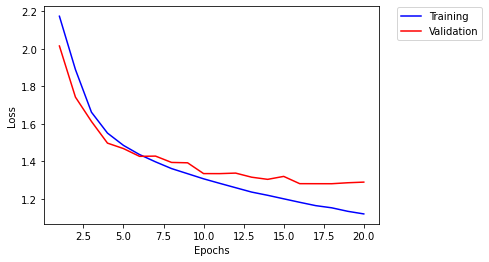

In [13]:
loss_train_history = training_history['train_loss']
plt.plot(np.arange(1,len(loss_train_history)+1), loss_train_history, color= 'blue', label = 'Training')
loss_valid_history = training_history['valid_loss']
plt.plot(np.arange(1,len(loss_valid_history)+1), loss_valid_history, color= 'red', label = 'Validation')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)

Now the accuracy's history.

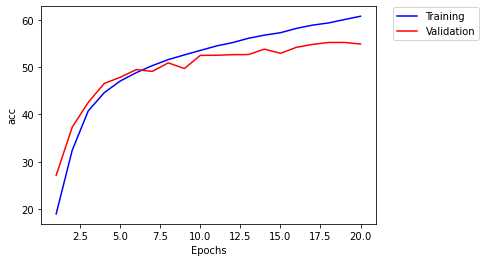

In [14]:
loss_train_history = training_history['train_acc']
plt.plot(np.arange(1,len(loss_train_history)+1), loss_train_history, color= 'blue', label = 'Training')
loss_valid_history = training_history['valid_acc']
plt.plot(np.arange(1,len(loss_valid_history)+1), loss_valid_history, color= 'red', label = 'Validation')

plt.xlabel('Epochs')
plt.ylabel('acc')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1) 

## 4. Testing

Usually, when creating and training machine learning models, one has to have three datasets, the training set, the validation set and the testing set. The testing set aims to help us evaluate the model's performance once the training process is finished, in contrast with the validation set, which is used to track the model's performance during the training process. 

Unfortunately, the CIFAR10 dataset only provides the training and the validation sets. However, for illustrative purposes only, down bellow, we evaluate our model on the validation set. We want to stress that, in real-life applications or research, we must perform the testing of our model on a set that's disjoint from the training and validation sets.

In [15]:
test_loss, test_acc = torch_utils.evaluate(network = hand_made_net, dataloader = valid_dataloader, loss_fn = loss_fn, device = fancy_gpu)
print('test loss = ' + str(round(test_loss,2)) + ', test accuracy = ' + str(round(test_acc,2)))

test loss = 1.29, test accuracy = 54.89
